In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
def bestmodel(x, y, scalers = None, models = None):
    
    if scalers == None:
        scale = [StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]
    else: 
        scale = scalers

    if models == None:
        entro = DT(criterion="entropy")
        gin = DT(criterion="gini")
        lo = LogisticRegression()
        sv = SVC()
        classifier = [entro, gin, lo, sv]
    else: 
        classifier = models
    
    ent_scale, ent_par, ent_acc, ent_fper, ent_tper = [], [], [], [], []
    ent_df = pd.DataFrame()

    gini_scale, gini_par, gini_acc, gini_fper, gini_tper = [], [], [], [], []
    gini_df = pd.DataFrame()
    
    log_scale, log_par, log_acc,log_fper, log_tper = [], [], [], [], []
    log_df = pd.DataFrame()
    
    svc_scale, svc_par, svc_acc, svc_fper, svc_tper = [], [], [], [], []
    svc_df = pd.DataFrame()
    
    ent_param = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}
    gini_param = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}
    log_param = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2',"elasticnet","none"]}
    svc_param = [{'kernel':['linear'],'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.01, 0.05, 0.1, 0.5, 1, 3, 7]},
                {'kernel':['poly'],'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.01, 0.05, 0.1, 0.5, 1, 3, 7]},
                {'kernel':['sigmoid'],'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.01, 0.05, 0.1, 0.5, 1, 3, 7]},
                {'kernel':['rbf'],'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.01, 0.05, 0.1, 0.5, 1, 3, 7]}]


    ent_best, gini_best, log_best, svc_best = 0, 0, 0, 0
    ent_k, gini_k, log_k, svc_k = 0, 0, 0, 0

    for model in classifier:
        for i in scale:
            scaler = i
            scaler = pd.DataFrame(scaler.fit_transform(x))
            for k in range(3, 11):
                cv1=KFold(n_splits=k)
                x_train, x_test, y_train, y_test = train_test_split(scaler, y, test_size=0.2, shuffle=False)
                if model == entro:
                    ent_grid = GridSearchCV(model, param_grid=ent_param, cv=cv1)
                    ent_grid.fit(x_train, y_train)
                    pred = ent_grid.predict(x_test)
                    ent_scale.append(i)
                    ent_par.append(ent_grid.best_params_)
                    ent_acc.append( accuracy_score(y_test,pred))
                    ent_fper.append(roc_curve(y_test, pred)[0])
                    ent_tper.append(roc_curve(y_test, pred)[1])
                    compare = ent_grid.best_score_
                    if compare >= ent_best:
                        ent_k = k
                        ent_best = compare     
                
                elif model == gin:
                    gini_grid = GridSearchCV(model, param_grid=gini_param, cv=cv1)
                    gini_grid.fit(x_train, y_train)
                    pred = gini_grid.predict(x_test)
                    gini_scale.append(i)
                    gini_par.append(gini_grid.best_params_)
                    gini_acc.append(accuracy_score(y_test,pred))
                    pred = gini_grid.predict(x_test)
                    gini_fper.append(roc_curve(y_test, pred)[0])
                    gini_tper.append(roc_curve(y_test, pred)[1])
                    compare = gini_grid.best_score_
                    if compare >= gini_best:
                        gini_k = k
                        gini_best = compare

                elif model == lo:
                    log_grid = GridSearchCV(model, param_grid=log_param, cv=cv1)
                    log_grid.fit(x_train, y_train)
                    pred = log_grid.predict(x_test)
                    log_scale.append(i)
                    log_par.append(log_grid.best_params_)
                    log_acc.append(accuracy_score(y_test,pred))
                    pred = log_grid.predict(x_test)
                    log_fper.append(roc_curve(y_test, pred)[0])
                    log_tper.append(roc_curve(y_test, pred)[1])
                    compare = log_grid.best_score_
                    if compare >= log_best:
                        log_k = k
                        log_best = compare

                


                elif model == sv:
                    svc_grid = GridSearchCV(model, param_grid=svc_param, cv=cv1)
                    svc_grid.fit(x_train, y_train)
                    pred = svc_grid.predict(x_test)
                    svc_scale.append(i)
                    svc_par.append(svc_grid.best_params_)
                    svc_acc.append(accuracy_score(y_test,pred))
                    pred = svc_grid.predict(x_test)
                    svc_fper.append(roc_curve(y_test, pred)[0])
                    svc_tper.append(roc_curve(y_test, pred)[1])
                    compare = svc_grid.best_score_
                    if compare >= svc_best:
                        svc_k = k
                        svc_best = compare
            

    ent_df["sclae"], ent_df["params"], ent_df["accurancy"], ent_df["fper"], ent_df["tper"] = ent_scale, ent_par, ent_acc, ent_fper, ent_tper

    gini_df["sclae"], gini_df["params"], gini_df["accurancy"], gini_df["fper"], gini_df["tper"] = gini_scale, gini_par, gini_acc, gini_fper, gini_tper

    log_df["sclae"], log_df["params"], log_df["accurancy"], log_df["fper"], log_df["tper"] = log_scale, log_par, log_acc, log_fper, log_tper

    svc_df["sclae"], svc_df["params"], svc_df["accurancy"], svc_df["fper"], svc_df["tper"] = svc_scale, svc_par, svc_acc, svc_fper, svc_tper


    ent_df = ent_df.sort_values(by=["accurancy"], ascending=[False]).iloc[0]
    gini_df = gini_df.sort_values(by=["accurancy"], ascending=[False]).iloc[0]
    log_df = log_df.sort_values(by=["accurancy"], ascending=[False]).iloc[0]
    svc_df = svc_df.sort_values(by=["accurancy"], ascending=[False]).iloc[0]

    print("Decision Tree (Entropy):\n", ent_df, "\n")
    print("-"*20)
    print("Decision Tree (GINI):\n", gini_df, "\n")
    print("-"*20)
    print("Logistic Regression:\n", log_df, "\n")
    print("-"*20)
    print("Support Vector Machine:\n", svc_df, "\n")
    
    plt.figure(figsize=(15, 15))

    fpr = [ent_df[3], gini_df[3], log_df[3], svc_df[3]]
    tpr = [ent_df[4], gini_df[4], log_df[4], svc_df[4]]
    
    kind = ["entropy", "gini", "logistic", "SVM"]


    for i in range(1,5):
        plt.subplot(220 + i)
        plt.plot(fpr[i-1], tpr[i-1], color='red', label='ROC')
        plt.plot([0, 1], [0, 1], color='green', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC CURVE of {}'.format(kind[i-1]))
        plt.legend()

    plt.tight_layout()
    plt.show()
      
        
    print("Decistion model (entropy) best k of k-fold : ", ent_k)
    print("-"*20)
    print("\nDecistion model (gini) best k of k-fold : ", gini_k)
    print("-"*20)
    print("\nLogisctic model best k of k-fold : ", log_k)
    print("-"*20)
    print("\nSVM model best k of k-fold : ", svc_k)



In [3]:
col = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", 
        "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

df = pd.read_csv("/Users/unixking/Desktop/머신러닝/breast-cancer-wisconsin.txt", delimiter= ',', names = col)

df["Bare Nuclei"] = df["Bare Nuclei"].apply(lambda x: np.nan if x.isdigit() == False else x)

df = df.dropna()

df["Class"] = df["Class"].apply(lambda x: 0 if x == 2 else 1)

df = df.astype('int')


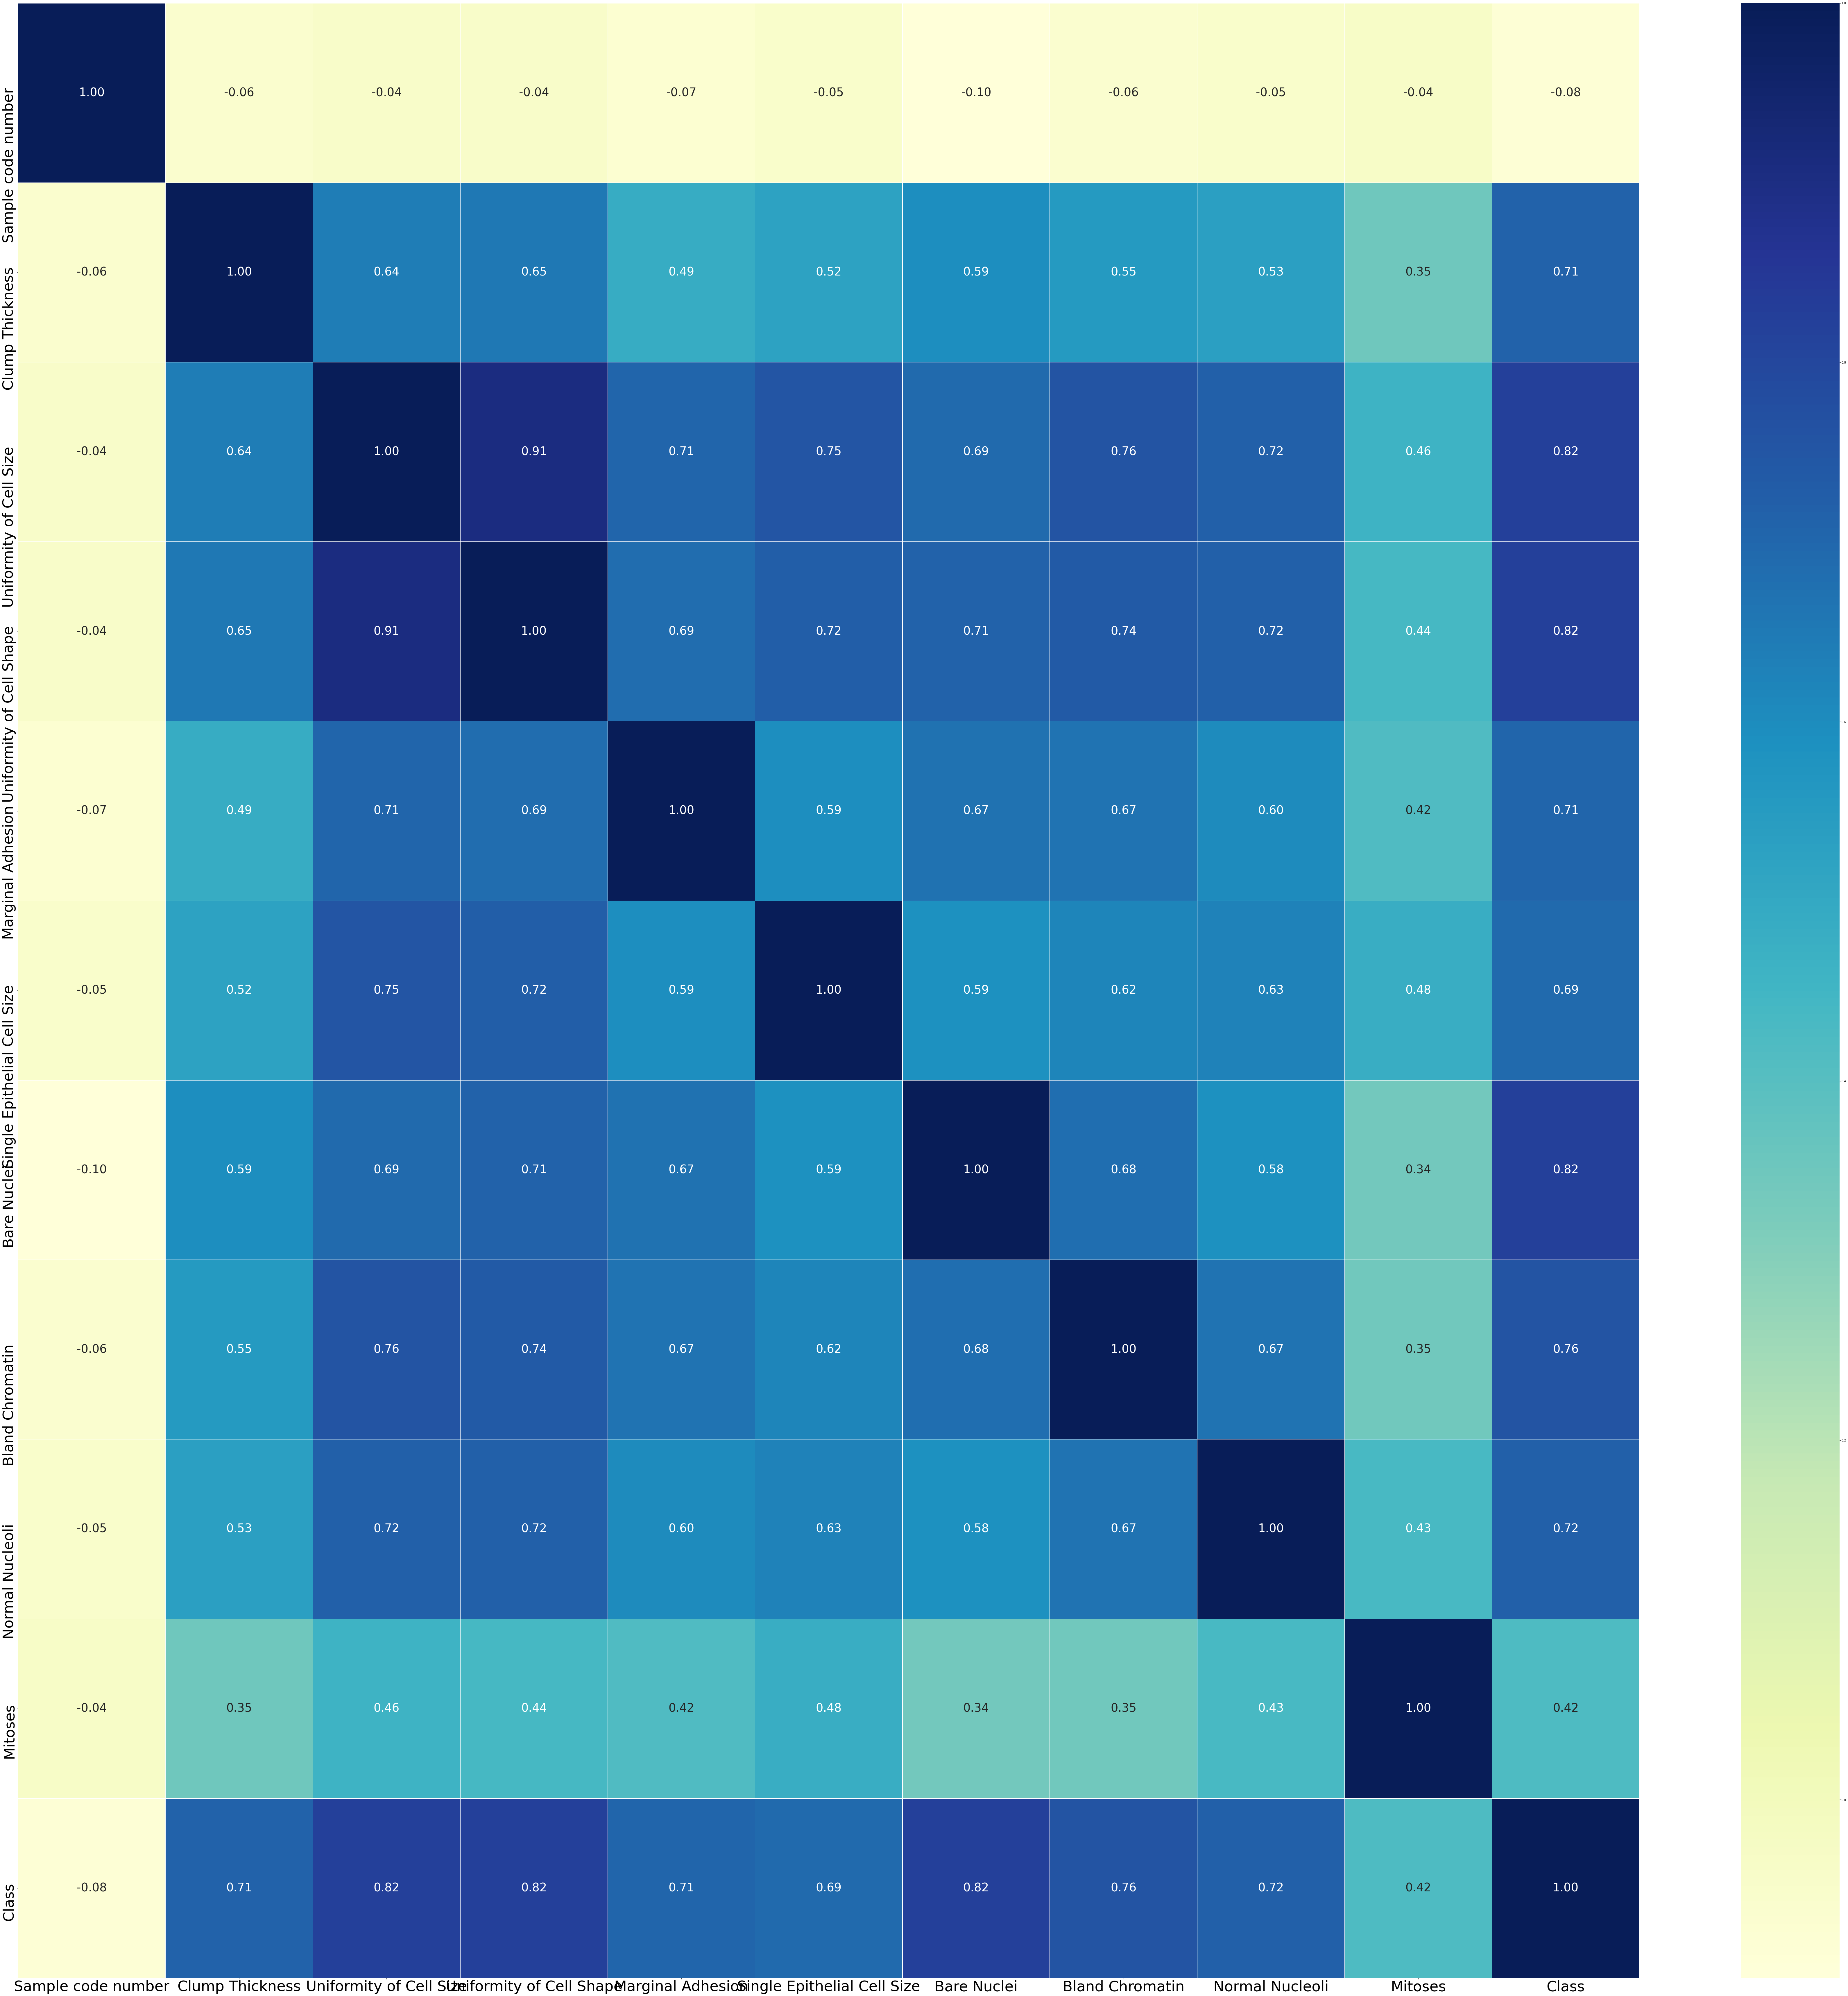

In [4]:
fig, ax = plt.subplots(figsize=(125,125))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':40}, fmt='0.2f', cmap="YlGnBu", linewidths=0.5)
ax.tick_params(axis='both', labelsize=50);
plt.show()

df = df.drop(['Sample code number'], axis = 1)

x = df[['Clump Thickness', 'Uniformity of Cell Size',
        'Uniformity of Cell Shape', 'Marginal Adhesion',
        'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
        'Normal Nucleoli', 'Mitoses']]

y = df[["Class"]]

Decision Tree (Entropy):
 sclae                                StandardScaler()
params       {'max_depth': 3, 'min_samples_split': 2}
accurancy                                    0.956204
fper                   [0.0, 0.0196078431372549, 1.0]
tper                   [0.0, 0.8857142857142857, 1.0]
Name: 0, dtype: object 

--------------------
Decision Tree (GINI):
 sclae                                  MaxAbsScaler()
params       {'max_depth': 3, 'min_samples_split': 2}
accurancy                                    0.948905
fper                   [0.0, 0.0392156862745098, 1.0]
tper                   [0.0, 0.9142857142857143, 1.0]
Name: 19, dtype: object 

--------------------
Logistic Regression:
 sclae                 StandardScaler()
params       {'C': 1, 'penalty': 'l2'}
accurancy                          1.0
fper                   [0.0, 0.0, 1.0]
tper                   [0.0, 1.0, 1.0]
Name: 0, dtype: object 

--------------------
Support Vector Machine:
 sclae                         

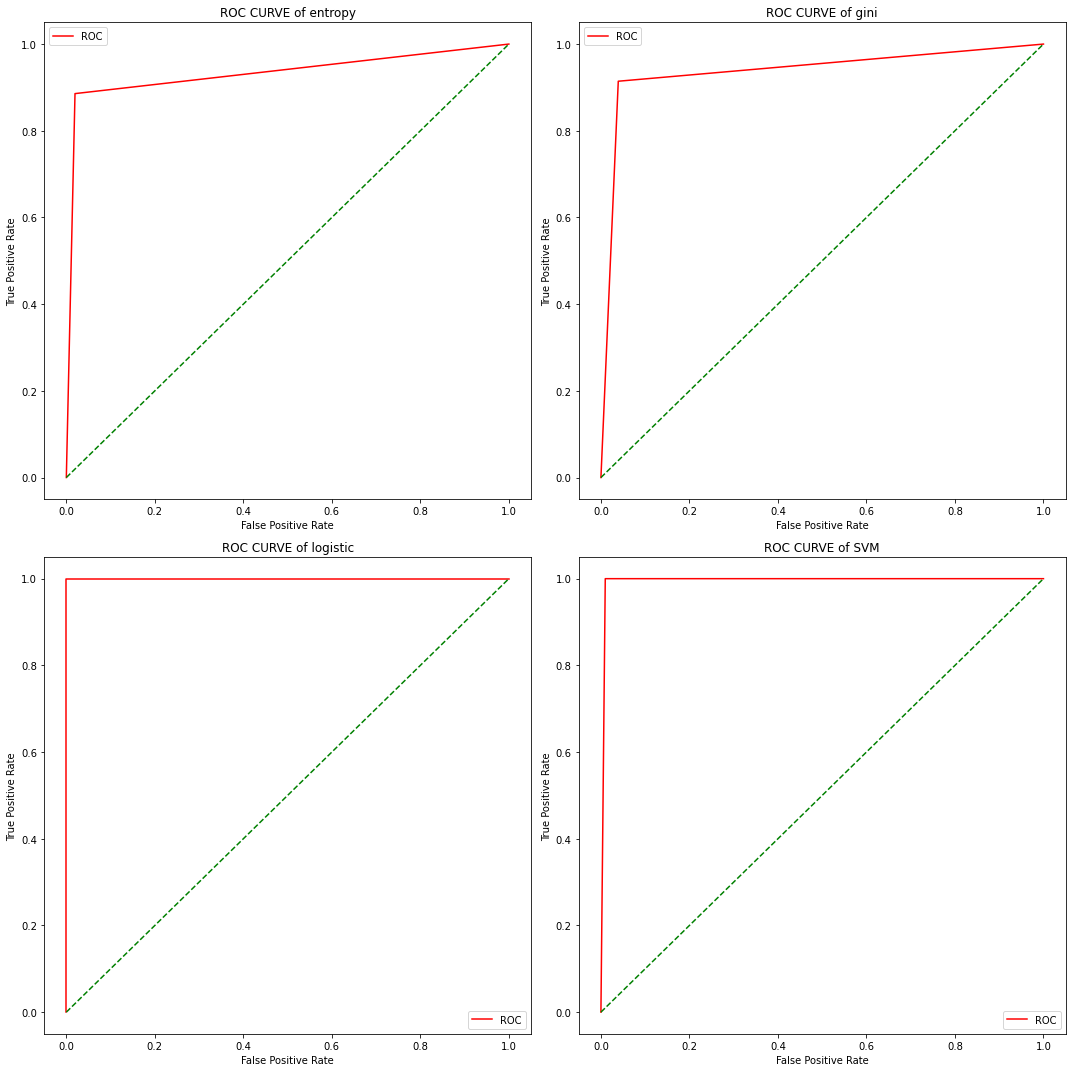

Decistion model (entropy) best k of k-fold :  10
--------------------

Decistion model (gini) best k of k-fold :  10
--------------------

Logisctic model best k of k-fold :  10
--------------------

SVM model best k of k-fold :  10


In [5]:
bestmodel(x, y)